# Classification (14 points):
Each item worth 2 points, except item 6 which is worth 4 points.

For each question that asks to implement a function, implement it in the top cell where it is defined and then execute the function in the code cell provided below the question. <br>
You should base your answers on the output.<br>
You are allowed to implement and use additional functions. These would be defined and implemented in the
cell directly below the questions they were implemented for.

All the textual answers should be based on and justified with output from the data in the code cell above.<br>
For example, if the question asks about the correlation value, the code calculating it should appear above the answer, and the value should be in the output.
The answers should be concise and written in your own words.


### <span style="color:red">Do Not Modify the Structure of this Notebook, don't add/remove/move cells or change their type (Code/Markdown) </span>

1. [Read the feather file 'TrainQuestionsDF.feather.zstd' into a pandas dataframe. <br>Use the function train_test_split to split the data into two sets, 75% for training and 25% for validation. <br> Generate stratified samples with the *random_state=RANDOM_SEED*.](#q1)
<br><br>
2. [Implement the function `fit_tree_classifier(X, y)`, then use it to fit a decision tree classifier on the train dataset and generate prediction for the validation data set. <br>Use only the numerical columns as features (you can use the function from DataExploration).](#q2)
<br><br>
3. [Implement the function `evaluate_classification(y_true, y_predicted)`, then use it to evaluate the classification made by the decision tree classifier on the validation dataset.](#q3)
<br><br>
4. [Implement the function `fit_knn_classifier(X, y)` and use it to fit the model on the train data and then generate prediction for the validation data. Using the previous evaluation.](#q4)
<br><br>
5. [Now we turn to a different features set, we will utilize the text in the Title field of each sample to generate a features vector for the sample. <br> You should apply the TfidfVectorizer to generate tf-idf (term frequency-inverse document frequency) features from the text in the Title field of each sample. <br>Make sure to use the same vocabulary for both the training set and the validation. The vocabulary size determines the vector size, each entry in the vector represents the tf-idf value for the corresponding term. <br> Implement the function `series_to_tfidf(sr)`, then generate tf-idf vectors for the training and validation sets and train two classifiers (decision tree and knn) using the generated vectors.](#q5)
<br><br>
6. [Using the documentation for the two classification and the text feature extraction models and their different parameters. <br>Find a combination of parameters that improves the accuracy for each model, and for at least one of the models the improvement should be by at least 5% on the validation dataset. <br>Write your code below and describe the changes you made and the intuition behind them. <br>For applying a systematic search, i.e. not just manually checking for different parameters.](#q6)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# TODO: Any additional (if needed) import statements should be in this cell
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline

In [3]:
# TODO: Set the random seed as your student id (only numbers)
RANDOM_SEED = 3933758
np.random.seed(RANDOM_SEED)

In [4]:
# This cell is for functions given to you to use
def read_feather_to_df(feather_file_name):
    """
    The function expects to receive a path to feather file,
    it will read the file from the disk into a pandas dataframe
    :param feather_file_name: a string or path like object
    :return: pd.DataFrame
    """
    return pd.read_feather(feather_file_name)


In [5]:
# This cell is for all the functions you are expected to implement.
# You should implement them here and only call them below when they are mentioned in a question.

def select_numeric_non_id_columns(df):
    """
    Return a subset of a DataFrame’s columns based on the column dtypes,
    including only numerical columns and excluding columns with the string id (case-insensitive) in their name
    :param df: pd.DataFrame
    :return: pd.DataFrame
    """
    # TODO: write your code here
    df = df.select_dtypes(include=['Int64'])
    df = df.loc[:, ~df.columns.str.contains("Id")]
    return df


def fit_tree_classifier(X, y, **decisiontree_kwargs):
    """
    The function receives a multidimensional array or a dataframe of features as X and one dimensional array or pandas Series as y.
    It creates a DecisionTreeClassifier classifier with random_state=RANDOM_SEED, fits it on X and y and returns the fitted classifier.
    :param X: ndarray, pd.DataFrame or a sparse matrix; data features
    :param y: array-like; data class labels
    :param decisiontree_kwargs: key-word arguments that will be passed to DecisionTreeClassifier class
    :return: a fitted DecisionTreeClassifier object
    """
    # TODO: write your code here
    clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
    clf = clf.fit(X,y)
    return clf


def fit_knn_classifier(X, y, **knn_kwargs):
    """
    The function receives a multidimensional array or a dataframe of features as X, on dimensional array or pandas Series as y.
    It creates a DecisionTreeClassifier classifier with random_state=RANDOM_SEED, fits it on X and y and returns the fitted classifier.
    :param X: ndarray, pd.DataFrame or a sparse matrix; data features
    :param y: array-like; data class labels
    :param knn_kwargs: key-word arguments that will be passed to KNeighborsClassifier class
    :return: a fitted KNeighborsClassifier object
    """
    # TODO: write your code here
    neigh = KNeighborsClassifier(n_neighbors= 5, weights="distance")
    neigh = neigh.fit(X,y)
    return neigh


def evaluate_classification(y_true, y_predicted):
    """
    The function receives two arrays or pandas Series with the same length, the actual labels and the predicted labels.
    It then prints the sklearn classification_report and plots a confusion matrix as a heatmap using the class ConfusionMatrixDisplay.
    The plot should be readable (e.g. not overlapping labels or too small text)
    :param y_true: array-like; ground truth data class labels
    :param y_predicted: array-like; predicted data class labels
    """
    # TODO: write your code here
    print(classification_report(y_true, y_predicted))
    mat=ConfusionMatrixDisplay.from_predictions(y_true, y_predicted, xticks_rotation=40)
    return


def series_to_tfidf(sr, **tfidfvectorizer_kwargs):
    """
    The function receives an array or a pandas Series that contains text strings (a.k.a documents).
    It then converts the documents into a matrix of TF-IDF features
    The function should return two objects:
    TfidfVectorizer object after it learned (fitted) the vocabulary and idf from the training set,
    and a document-term matrix (the original documents array transformed into a TF-IDF features matrix).
    :param sr: pd.Series, contains text strings
    :param tfidfvectorizer_kwargs: key-word arguments that will be passed to TfidfVectorizer class
    :return: two objects, the fitted TfidfVectorizer object and the tf-idf document-term sparse matrix
    """
    # TODO: write your code here
    vectorizer = TfidfVectorizer(max_features=100,
                                #max_df=0.8,
                                min_df=5,
                                stop_words='english')
    vectors = vectorizer.fit_transform(sr)
    return vectorizer, vectors

### <a name="q1"></a> 1. Read the feather file 'TrainQuestionsDF.feather.zstd' into a pandas dataframe. <br>Use the function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data into two sets, 75% for training and 25% for validation. <br> Generate stratified samples with the **random_state=RANDOM_SEED**.

In [6]:
# TODO: write your function calls and code here
df = read_feather_to_df("TrainQuestionsDF.feather.zstd")
X = df.drop(columns=['Label'])
y = df.Label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=RANDOM_SEED, stratify=y)

### <a name="q2"></a> 2. Implement the function `fit_tree_classifier(X, y, **decisiontree_kwargs)`, then use it to fit a decision tree classifier on the train dataset and generate prediction for the validation data set. Make sure to set **random_state=RANDOM_SEED** within the function. <br>Use only the numerical columns as features and print the labels of the first 5 predictions (you can use the function from DataExploration).

In [7]:
# TODO: write your function calls and code here
clf = fit_tree_classifier(select_numeric_non_id_columns(X_train),y_train, random_state= RANDOM_SEED, max_depth=3)
y_pred= clf.predict(select_numeric_non_id_columns(X_test))
print(y_pred.shape)
print(y.shape)
print(y_test.shape)
print(y_pred[0:5,])

(5253,)
(21011,)
(5253,)
['distributions' 'distributions' 'time-series' 'probability' 'logistic']


### <a name="q3"></a> 3. Implement the function `evaluate_classification(y_true, y_predicted)`, then use it to evaluate the classification made by the decision tree classifier on the validation dataset.<br>3.1 For which label did the model achieve the best result, and how many samples were classified correctly for that label? <br>3.2 How many samples with the label 'bayesian' were classified as 'time-series'? <br>3.3 Was the model successful?

                    precision    recall  f1-score   support

          bayesian       0.15      0.17      0.16       751
     distributions       0.15      0.16      0.16       750
hypothesis-testing       0.17      0.17      0.17       751
          logistic       0.17      0.17      0.17       750
       probability       0.15      0.15      0.15       751
        self-study       0.18      0.16      0.17       750
       time-series       0.16      0.13      0.14       750

          accuracy                           0.16      5253
         macro avg       0.16      0.16      0.16      5253
      weighted avg       0.16      0.16      0.16      5253



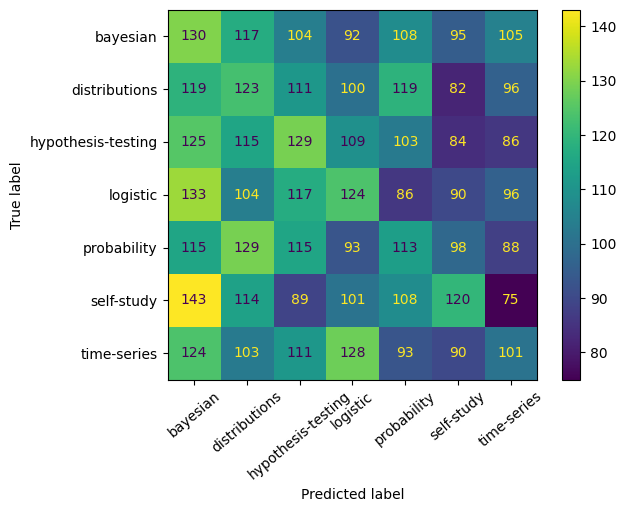

In [8]:
# TODO: write your function calls and code here
evaluate_classification(y_test, y_pred)

The model achieved the best results for Bayesian Label, correctly predicting 696 samples. The model incorrectly classified 14 samples as 'time-series' which were actually bayesian.With an overall model accuracy of 0.84, this model was reasonably successful at predicting labels.

### <a name="q4"></a> 4. Implement the function `fit_knn_classifier(X, y)` and use it to fit the model on the train data and then generate prediction for the validation data. Using the previous evaluation answer the following questions: <br>4.1 Which model achieved higher accuracy on the validation set? <br>4.2 Can you identify a bias towards a certain class in the result?

                    precision    recall  f1-score   support

          bayesian       0.14      0.18      0.16       751
     distributions       0.17      0.18      0.17       750
hypothesis-testing       0.16      0.16      0.16       751
          logistic       0.15      0.15      0.15       750
       probability       0.16      0.15      0.15       751
        self-study       0.17      0.15      0.16       750
       time-series       0.17      0.16      0.16       750

          accuracy                           0.16      5253
         macro avg       0.16      0.16      0.16      5253
      weighted avg       0.16      0.16      0.16      5253



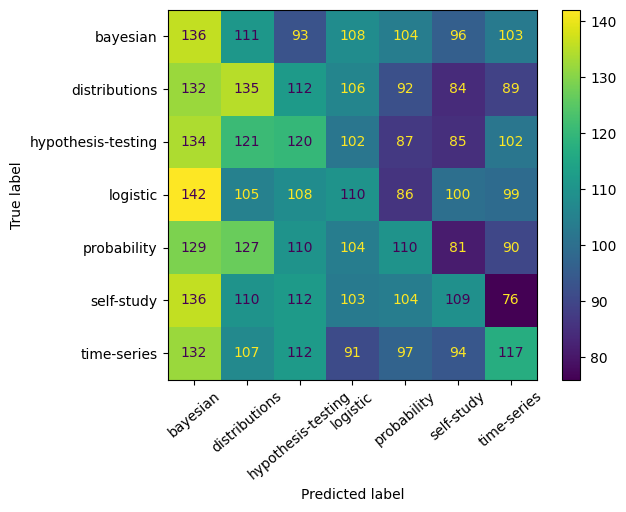

In [9]:
# # TODO: write your function calls and code here
neigh = fit_knn_classifier(select_numeric_non_id_columns(X_train),y_train)
y_pred_neigh= neigh.predict(select_numeric_non_id_columns(X_test))
evaluate_classification(y_test, y_pred_neigh)

The fit_tree_classifier model achieved a higher accuracuy than the KNN on the validation set. There is a bias towards the 'bayesian' class in both models, with that class being predicted the most.

### <a name="q5"></a> 5. Now we turn to a different features set, we will utilize the text in the Title field of each sample to generate a features vector for the sample. <br> You should apply the [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to generate tf-idf (term frequency-inverse document frequency) features from the text in the Title field of each sample. <br>Make sure to use the same vocabulary for both the training set and the validation. The vocabulary size determines the vector size, each entry in the vector represents the tf-idf value for the corresponding term. <br> Implement the function `series_to_tfidf(sr, **tfidfvectorizer_kwargs)`, then generate tf-idf vectors for the training and validation sets and train two classifiers (decision tree and knn) using the generated vectors. Answer the following questions:<br>5.1 Which model achieves higher accuracy on the validation set? <br>5.2 For each model specify the label it gets most correct and most incorrect prediction for.

                    precision    recall  f1-score   support

          bayesian       0.73      0.64      0.68       751
     distributions       0.58      0.56      0.57       750
hypothesis-testing       0.65      0.65      0.65       751
          logistic       0.76      0.70      0.73       750
       probability       0.54      0.47      0.50       751
        self-study       0.30      0.42      0.35       750
       time-series       0.64      0.60      0.62       750

          accuracy                           0.58      5253
         macro avg       0.60      0.58      0.59      5253
      weighted avg       0.60      0.58      0.59      5253

                    precision    recall  f1-score   support

          bayesian       0.63      0.58      0.61       751
     distributions       0.49      0.54      0.52       750
hypothesis-testing       0.64      0.64      0.64       751
          logistic       0.72      0.68      0.70       750
       probability       0.53      0

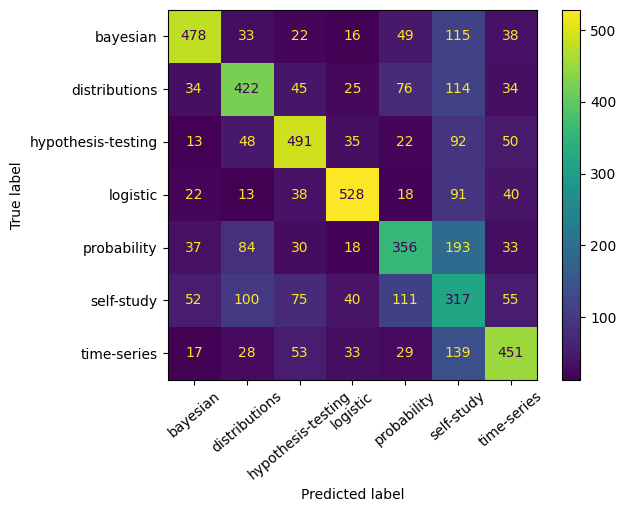

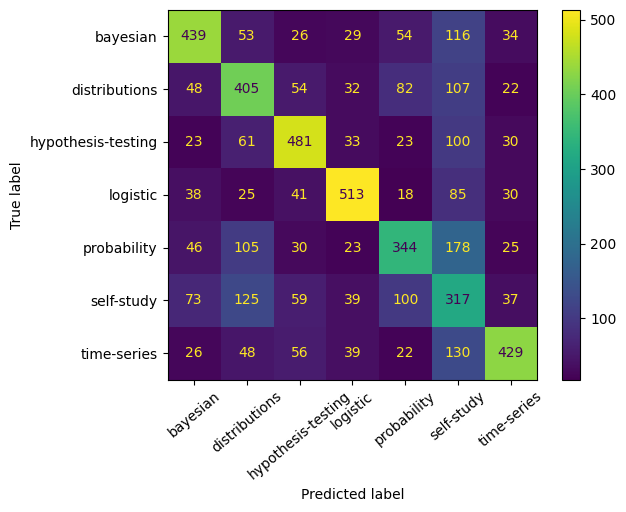

In [10]:
# TODO: write your function calls and code here
TFIDF_train_vect= series_to_tfidf(X_train.Title)
tfidf_test_vect= TFIDF_train_vect[0].transform(X_test['Title'])
#classifiers
tree_tfidf = fit_tree_classifier(TFIDF_train_vect[1],y_train)
y_pred_tfidf_tree= tree_tfidf.predict(tfidf_test_vect)
evaluate_classification(y_test, y_pred_tfidf_tree)
knn_tfidf= fit_knn_classifier(TFIDF_train_vect[1],y_train)
y_pred_tfidf_KNN= knn_tfidf.predict(tfidf_test_vect)
evaluate_classification(y_test, y_pred_tfidf_KNN)

The fit_tree_classifier() scored a slighlty higher accuracy on the validation set (0.58). For both models, 'logisitc' was correctly predicted the most, whilst 'self-study' was incorrectly predicted the most.

### <a name="q6"></a> 6. Using the documentation for the two classification and the text feature extraction models and their different parameters. <br>Find a combination of parameters that improves the accuracy for each model, and for at least one of the models the improvement should be by at least 5% on the validation dataset. <br>Write your code below and describe the changes you made and the intuition behind them. <br>1 point will be awarded for applying a systematic search, i.e. not just manually checking different values for different parameters.

In [11]:
# TODO: write your function calls and code here
# Decision tree tuning
#Create the parameter grid based on the results of random search- 0.16 is current accuracy 
params = {
    'max_depth': [2,3,5,7,9,10,12],
    'min_samples_leaf': [5, 10, 20, 50, 100,150,160,175,185,209,210,212],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=fit_tree_classifier(select_numeric_non_id_columns(X_train),y_train), 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(select_numeric_non_id_columns(X_train), y_train)
print("Best Tree score and parameters:")
print(grid_search.best_score_)
print(grid_search.best_params_)

#KNN tuning
##0.16 is current accuracy 
grid_params = { 'n_neighbors' : [33,38,39,40,41,42,43,49,50,55],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid_params, verbose = 1, cv=4, n_jobs = -1)
g_res = gs.fit(select_numeric_non_id_columns(X_train), y_train)
print("Best KNN score and parameters:")
print(g_res.best_score_)
print(g_res.best_params_)

##text feature extraction with classifiers 
#Decision tree with tfidf prev accuracy = 0.58
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())])

parameters = {
    #'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__min_df':np.arange(1,10,1),
    #'clf__max_depth': np.arange(1,10,1),
    'tfidf__stop_words':['english'],
    'clf__random_state':[RANDOM_SEED],
    #'clf__min_samples_split': np.arange(1,4,1),
    'tfidf__use_idf': (True, False) #means we score only with TF not IDF to-interesting this improved performance
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1, verbose=3)
grid_search_tune.fit(X_train.Title, y_train)
print("Best Tree TF-IDF score and parameters:")
print(grid_search_tune.best_score_)
print(grid_search_tune.best_params_)


#KNN with tfidf prev accuracy = 0.56
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', KNeighborsClassifier())])

parameters = {
    #'tfidf__max_df': (0.25, 0.5, 0.75),
    #'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__n_neighbors': np.arange(1,42,2),
    'tfidf__stop_words':['english'],
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1, verbose=3)
grid_search_tune.fit(X_train.Title, y_train)
print("Best KNN TF-IDF score and parameters:")
print(grid_search_tune.best_score_)
print(grid_search_tune.best_params_)
# 0.62-0.56 = 0.6 or 6% improvement 

Fitting 4 folds for each of 168 candidates, totalling 672 fits
Best Tree score and parameters:
0.1939327117990987
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 210}
Fitting 4 folds for each of 60 candidates, totalling 240 fits
Best KNN score and parameters:
0.17394343690518993
{'metric': 'manhattan', 'n_neighbors': 41, 'weights': 'uniform'}
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Best Tree TF-IDF score and parameters:
0.6085797690062191
{'clf__random_state': 3933758, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': 'english', 'tfidf__use_idf': False}
Fitting 2 folds for each of 21 candidates, totalling 42 fits
Best KNN TF-IDF score and parameters:
0.620954435842112
{'clf__n_neighbors': 41, 'tfidf__stop_words': 'english'}
[CV 2/2] END clf__random_state=3933758, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__stop_words=english, tfidf__use_idf=False;, score=0.604 total time=   3.8s
[CV 2/2] END clf__random_state=3933758, tfidf__m

[CV 2/2] END clf__random_state=3933758, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__stop_words=english, tfidf__use_idf=True;, score=0.591 total time=   1.4s
[CV 1/2] END clf__random_state=3933758, tfidf__min_df=1, tfidf__ngram_range=(1, 3), tfidf__stop_words=english, tfidf__use_idf=False;, score=0.604 total time=   7.4s
[CV 2/2] END clf__random_state=3933758, tfidf__min_df=3, tfidf__ngram_range=(1, 1), tfidf__stop_words=english, tfidf__use_idf=True;, score=0.591 total time=   1.8s
[CV 2/2] END clf__random_state=3933758, tfidf__min_df=3, tfidf__ngram_range=(1, 3), tfidf__stop_words=english, tfidf__use_idf=True;, score=0.598 total time=   2.0s
[CV 2/2] END clf__random_state=3933758, tfidf__min_df=4, tfidf__ngram_range=(1, 2), tfidf__stop_words=english, tfidf__use_idf=False;, score=0.605 total time=   1.7s
[CV 1/2] END clf__random_state=3933758, tfidf__min_df=5, tfidf__ngram_range=(1, 1), tfidf__stop_words=english, tfidf__use_idf=False;, score=0.608 total time=   1.3s
[CV 2/2] END 

[CV 2/2] END clf__random_state=3933758, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__stop_words=english, tfidf__use_idf=True;, score=0.590 total time=   4.1s
[CV 1/2] END clf__random_state=3933758, tfidf__min_df=2, tfidf__ngram_range=(1, 1), tfidf__stop_words=english, tfidf__use_idf=False;, score=0.610 total time=   1.5s
[CV 1/2] END clf__random_state=3933758, tfidf__min_df=2, tfidf__ngram_range=(1, 2), tfidf__stop_words=english, tfidf__use_idf=False;, score=0.605 total time=   2.1s
[CV 2/2] END clf__random_state=3933758, tfidf__min_df=2, tfidf__ngram_range=(1, 3), tfidf__stop_words=english, tfidf__use_idf=True;, score=0.596 total time=   2.8s
[CV 1/2] END clf__random_state=3933758, tfidf__min_df=3, tfidf__ngram_range=(1, 2), tfidf__stop_words=english, tfidf__use_idf=False;, score=0.606 total time=   1.8s
[CV 2/2] END clf__random_state=3933758, tfidf__min_df=4, tfidf__ngram_range=(1, 1), tfidf__stop_words=english, tfidf__use_idf=True;, score=0.589 total time=   1.3s
[CV 2/2] END 

*For the two classification models used, a grid searchCV was used whereby I could input and play with multiple parameters at once. For the KNN model using tf-idf text feature extraction I was able to improve the result by 6%. This was achieved through providing a list of multiple n_neighbours values to search, this parameter is most important when tuning a KNN model and thus a large range allowed for immediate improvement.
